## Q1

In [1]:
# pip install mlxtend

In [2]:
#importing the require libraries which will be using through this assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model, metrics
import statsmodels.api as sm
import scipy as scip
from scipy.stats import pearsonr
from scipy.stats import linregress
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error



In [3]:
df_FTSE100=pd.read_csv("FTSE100.csv")
df_FTSE100

,Date,Open,High,Low,Close,Volume,Adj Close
0,12/1/2016,6783.790000,6789.300000,6688.410000,6752.930000,966722048,6752.930000
1,11/1/2016,6954.220000,6993.790000,6903.610000,6917.140000,780871680,6917.140000
2,10/3/2016,6899.330000,6996.430000,6898.090000,6983.520000,745408640,6983.520000
3,9/1/2016,6781.510000,6826.220000,6723.210000,6745.970000,991756480,6745.970000
4,8/1/2016,6724.430000,6769.410000,6678.450000,6693.950000,727709696,6693.950000
...,...,...,...,...,...,...,...
307,5/1/1991,2487.399902,2554.899902,2444.600098,2499.500000,0,2499.500000
308,4/1/1991,2456.500000,2555.300049,2438.600098,2486.199951,0,2486.199951
309,3/1/1991,2374.899902,2527.100098,2368.399902,2456.500000,0,2456.500000
310,2/1/1991,2168.500000,2388.399902,2155.600098,2380.899902,0,2380.899902


## Q1.A.

In [4]:
#Loading and reading both data sets for making analysis
df_monthly= pd.read_excel("Monthly.xls")
df_monthly
df_FTSE100=pd.read_csv("FTSE100.csv")
df_FTSE100
df_monthly['Unnamed: 0']=pd.to_datetime(df_monthly['Unnamed: 0'])
df_monthly
df_FTSE100['Date']=pd.to_datetime(df_FTSE100['Date'])
df_monthly=df_monthly.rename(columns={'Unnamed: 0':'Date'})
df_monthly.set_index('Date', inplace=True)
df_FTSE100.set_index('Date', inplace=True)
df_monthly=df_monthly.sort_values(by='Date')
df_FTSE100=df_FTSE100.sort_values(by='Date')
df_FTSE100['Adj_Close_Returns'] = df_FTSE100['Close'].pct_change()
df_monthly['HousePrice_Returns'] = df_monthly['Average House Price'].pct_change()
df_monthly=df_monthly.loc["1991-01-01":"2016-12-01",:]
df_monthly.dropna(subset=['HousePrice_Returns'], inplace=True)
df_FTSE100.dropna(subset=['Adj_Close_Returns'], inplace=True)
df_FTSE100
df_monthly
# df_monthly=df_monthly.rename(columns={'Unnamed: 0':'Date'})


# plt.scatter(df_FTSE100['Adj_Close_Returns'],df_monthly['HousePrice_Returns'])
# df_monthly['HousePrice_Returns']
# df_FTSE100['Adj_Close_Returns']

,Average House Price,INDEX Q1 1993=100,Seasonally Adjusted Index,Monthly % Change (SA),Year % Change,Latest 3 months on previous 3 months,HousePrice_Returns
Date,,,,,,,
1991-02-01,53496.798746,106.720393,107.494996,0.003432,NaN,NaN,0.008390
1991-03-01,52892.861606,105.515603,106.525649,-0.009018,NaN,NaN,-0.011289
1991-04-01,53677.435270,107.080744,107.126622,0.005642,NaN,NaN,0.014833
1991-05-01,54385.726747,108.493710,107.266757,0.001308,NaN,NaN,0.013195
1991-06-01,55107.375085,109.933321,108.152117,0.008254,NaN,0.004352,0.013269
...,...,...,...,...,...,...,...
2016-08-01,206144.961815,411.237157,409.465432,0.007744,0.055643,0.009269,0.002089
2016-09-01,206014.691677,410.977282,410.292238,0.002019,0.053326,0.010542,-0.000632
2016-10-01,205904.191651,410.756846,410.256066,-0.000088,0.046223,0.011086,-0.000536


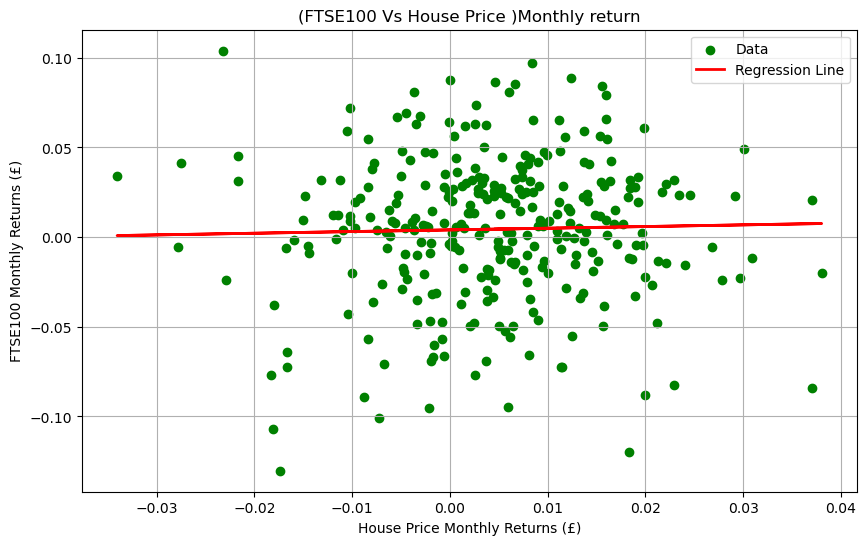

Constants:  LinregressResult(slope=0.007560709032702995, intercept=0.004400685906602274, rvalue=0.026551295701909915, pvalue=0.6409049000031651, stderr=0.016193638095225817, intercept_stderr=0.0006505476869549589)

correlation coefficient: 0.026551295701909915



In [5]:
#Extracting the data for require columns as well as reshaping them for the fure use particulary in fitting and predictin
y= df_FTSE100['Adj_Close_Returns'].values.reshape(-1, 1)
X= df_monthly['HousePrice_Returns'].values.reshape(-1,1)
                                       
#initializing the model
model=linear_model.LinearRegression()
#fitting the model where I Have to use the above declared independent and variables
model.fit(X, y)
model.coef_
#making a prediction by using prediction function 
y_prediction=model.predict(X)
# correlation=pearson
#finding the necessariry constante using linregress function 
constants= linregress( df_FTSE100['Adj_Close_Returns'], df_monthly['HousePrice_Returns'])
# import statsmodels.api as sm

# # Add a constant for the intercept
# X_with_constant = sm.add_constant(X)






# model.coef_
# correlation_coefficient=df_FTSE100['Adj_Close_Returns'].corr(df_monthly['HousePrice_Returns'])


#Printing the results as well as labeling my graph


plt.figure(figsize=(10,6))

plt.scatter(X,y, color='green', label='Data')


plt.plot(X,y_prediction,color='r', linewidth=2, label='Regression Line')


plt.xlabel('House Price Monthly Returns (£)')
plt.ylabel('FTSE100 Monthly Returns (£)')
plt.title('(FTSE100 Vs House Price )Monthly return' )
plt.legend()
plt.grid()

#showing out my graph
plt.show()

print(f"Constants:  {constants}\n")
print(f"correlation coefficient: {constants.rvalue}\n")


In [6]:
# df_FTSE100
# df_monthly

## Q1.B.

Slope(Coefficient of HousePricesReturns): Here the slope(change) in FTSE100 monthly returns for a one-unit change in house prices monthly returns is 0.0076. in our case is positive in this situation, this indicating that there is a positive association between housing prices and FTSE100 returns. Morever, this his value indicate that there is no relationship(very weak relationship).

Intercept (Constant):This intercept of 0.4401 estemated that FTSE100 monthly return when house prices monthly return is equal to zero. 

R-value (Correlation Coefficient):The correlation coefficient of 0.0266 implies that there is only a very slight positive linear association between property prices and FTSE100 returns. A score near 1 indicates a strong positive linear relationship, whereas a value near -1 indicates a strong negative linear association. Thus in this case this implies that the relationship is negligible.

P-value: The p-value associated with the coefficient HousePricesReturns is 0.6409. This p-value is relatively high compared to our normal significance level(alpha=0.05), implying that the coefficient is not statistically significant. This means there is insufficient information to establish that there is a strong association between housing prices and FTSE100 performance. 

## Q1.C.

In [7]:
# initializing gradient and p values Coefficient  gotten in the previous question
slope = 0.007560709032702989


p_value = 0.6409049000031652

# Define the significance level (alpha)
alpha = 0.05

# comparing the and investigating if we can reject the null hypothesis or not using if-else statement
if p_value < alpha:
    print(f"P-value ({p_value}) is less than alpha ({alpha}).")
    print("Reject the null hypothesis.")
    print("There is a significant relationship between house prices and FTSE100 returns.")
else:
    print(f"P-value ({p_value}) is greater than alpha ({alpha}).")
    print("Fail to reject the null hypothesis.")
    print("There is no significant relationship between house prices and FTSE100 returns.")


P-value (0.6409049000031652) is greater than alpha (0.05).
Fail to reject the null hypothesis.
There is no significant relationship between house prices and FTSE100 returns.


The p-value (0.6409) is considerably greater than the predefined significance level of 0.05 based on the result I got. As a result, the null hypothesis would fail to be rejected. This demostrate that there is no statistically meaningful relationship between housing prices and FTSE100. The p-value of 0.6409049000031652 implying that there is no significant relationship.

## Q2

## Q2.A.

In [8]:
#Loading and reading the data set using pandas library
df_college= pd.read_csv("College.csv")
df_college
df_college=df_college.rename(columns={"Unnamed: 0":"School"})
df_college

# print(correlation)
# correlation=pd.DataFrame(correlation)
# correlation
# cor=[df_college['Apps'],df_college['Enroll'], df_college['Outstate'],df_college['Top10perc'], df_college['Top25perc']]
List=['Apps', 'Enroll','Outstate','Top10perc','Top25perc','Grad.Rate']

List
correcoef_aforementioned_variables=df_college[List].corr()
# correcoef_aforementioned_variables=df_college[List].corr(df_college['Grad.Rate'])
#printing the result
correcoef_aforementioned_variables
# df_college['List']
# df_college[List].corr(df_college['Grad.Rate'])
# df_college[List]
# df_college

,Apps,Enroll,Outstate,Top10perc,Top25perc,Grad.Rate
Apps,1.000000,0.846822,0.050159,0.338834,0.351640,0.146755
Enroll,0.846822,1.000000,-0.155477,0.181294,0.226745,-0.022341
Outstate,0.050159,-0.155477,1.000000,0.562331,0.489394,0.571290
Top10perc,0.338834,0.181294,0.562331,1.000000,0.891995,0.494989
Top25perc,0.351640,0.226745,0.489394,0.891995,1.000000,0.477281
Grad.Rate,0.146755,-0.022341,0.571290,0.494989,0.477281,1.000000


## Q2.B.

In [11]:
# X_train, X_test,y_train, y_test = train_test_split(
#         df_college[List], df_college['Grad.Rate'],
#         test_size=0.3,
#         random_state=42)
#initiaizing the list of afrementioned variables 
List2=['Apps', 'Enroll','Outstate','Top10perc','Top25perc']
X=df_college[List2]
y=df_college['Grad.Rate']
model = LinearRegression()
sfs1 = sfs(model, k_features=2,forward=True,verbose=0, scoring='r2',cv=5)
# model.fit(X_train, y_train)
sfs1.fit(X,y)

# linear_model = LinearRegression()

useful_variables=list(sfs1.k_feature_names_)
# print(sfs1.k_feature_names_)

# df_college[List]
print(f"Useful variables:{useful_variables}")

Useful variables:['Outstate', 'Top25perc']


# Q2.C.




by considering the above feature selection result, I may conlude that the useful predictor among all five predictors are outstate and Top25perc.
to accomplish this task I started with initializing the list that hold the predictor variables.

later on I went for creating and initializing the linear model as I was requested by using sequential feature selection which was instanciated as sfs1

hereafter are the description and importance  for each keyword used in sequential feature selection

k_features this keyword demostrate that SFS will select the best subset of features based on some criteria.
forward=True means SFS will perform forward selection, which starts with an empty set of features and adds them one by one.
verbose=0 means no debugging output will be displayed during the feature selection process.
scoring='r2' indicates that the coefficient of determination (R-squared) is used to evaluate the model's performance.
cv=5 specifies 5-fold cross-validation, which is used to estimate the performance of the model.
                                                                                                       

## Q2.D.

## Building the model for selected variables

In [12]:
df_college=df_college.copy()
#initializing the model here I decided to use LassolarsIC function by setting bic as criterion to make the selection
model=linear_model.LassoLarsIC(criterion='bic', normalize=False)
# linear_model.LassoLarsIC(criterion='bic', normalize=False)
X= df_college[["Apps", "Enroll", "Outstate", "Top10perc","Top25perc"]]

y = df_college["Grad.Rate"]
#fitting the model with X and values as dependent and independent 
model.fit(X,y)
#extracting the variable which have been selected
selected_features_with_BIC=model.coef_
print(f"\nSelected predictor variables with BIC: {selected_features_with_BIC}\n\n")
# print(f"Selected predictor variables with BIC:",df_college[[0:3]] )
Var_selected=["Apps", "Enroll", "Outstate","Top25perc"]
#printing out the results
print(f"Selected predictor variables with BIC:{Var_selected}\n\n\n\n" )


Selected predictor variables with BIC: [ 0.00082806 -0.00293584  0.00186158  0.          0.17922103]


Selected predictor variables with BIC:['Apps', 'Enroll', 'Outstate', 'Top25perc']






/home/geredi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_base.py:116: FutureWarning: 'normalize' was deprecated in version 1.2 and will be removed in 1.4. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


## Building the model for useful predictors

# Q2.E.

### Computing the accuracy of the model used in stepwise by considering the useful variables found when we use stepwise

In [13]:
Useful_List = ['Outstate', 'Top25perc']
# initializing  the dependent variable and independent 
y = df_college["Grad.Rate"]
X_stepwise = df_college[Useful_List]

# Fitting the the  the linear regression model with stepwise-selected predictors
model_stepwise = LinearRegression()
model_stepwise.fit(X_stepwise, y)

# Making predictions for just using stepwise-selected predictors have been obtained
y_pred_stepwise = model_stepwise.predict(X_stepwise)

# investagating the Mean Squared Error (MSE) for the stepwise model
mse_stepwise = mean_squared_error(y, y_pred_stepwise)

# Calculate the R-squared (R2) for the stepwise model
r2_stepwise = r2_score(y, y_pred_stepwise)

print("Accuracy of the Stepwise Model:\n\n")
print("MSE:", mse_stepwise)
print("R-squared (R2):", r2_stepwise)


Accuracy of the Stepwise Model:


MSE: 183.36906602891167
R-squared (R2): 0.3777644174986873


### Computing the accuracy of the model used in BIC by considering the 4 useful variables found using the BIC

In [14]:
# Define the dependent variable (Grad.Rate) and independent variables for BIC as we have obtain the in the above
y = df_college["Grad.Rate"]
X_BIC = df_college[["Apps", "Enroll", "Outstate", "Top25perc"]]

# initializinng and fitting the model with BIC-selected predictors
model_BIC = LinearRegression()
model_BIC.fit(X_BIC, y)

# Making predictions using BIC-selected predictors
y_pred_BIC = model_BIC.predict(X_BIC)

# finding the Mean Squared Error (MSE) for the BIC model
mse_BIC = mean_squared_error(y, y_pred_BIC)

# Calculate the R-squared (R2) for the BIC model
r2_BIC = r2_score(y, y_pred_BIC)
#printing out the result
print("Accuracy of the BIC Model:\n")
print("MSE:", mse_BIC)
print("R-squared (R2):", r2_BIC)


Accuracy of the BIC Model:

MSE: 181.03167157338038
R-squared (R2): 0.3856960170430921


### Computing the accuracy of the model for all five predictors 

In [15]:
# Define the dependent variable (Grad.Rate) and independent variables (Predictors selected through BIC)
y = df_college["Grad.Rate"]
X_all= df_college[["Apps", "Enroll", "Outstate", "Top10perc", "Top25perc"]]

# Fit the linear regression model with BIC-selected predictors
model_all = LinearRegression()
model_all.fit(X_all, y)

# Make predictions using BIC-selected predictors
y_pred_all = model_all.predict(X_all)

# Calculate the Mean Squared Error (MSE) for the BIC model
mse_all = mean_squared_error(y, y_pred_all)

# Calculate the R-squared (R2) for the BIC model
r2_all = r2_score(y, y_pred_all)

print("Accuracy of the Model using all five predictors:\n")
print("MSE:", mse_all)
print("R-squared (R2):", r2_all)


Accuracy of the Model using all five predictors:

MSE: 180.89546889773055
R-squared (R2): 0.3861582005130556


# Q2.F.

In [16]:

dependent_Var=df_college['Grad.Rate']
# x = df_college.drop(['School', 'Private', 'Grad.Rate'], axis=1)
independent_Var=df_college[["Apps", "Enroll", "Outstate", "Top10perc", "Top25perc"]]


# X_selected_train, X_selected_test, y_selected_train, y_selected_test = train_test_split(x_selected, y1, test_size=0.2, random_state=42)
# model2 = LinearRegression()
model_all.fit(independent_Var, dependent_Var)
cmu_row = df_college.loc[df_college['School'] == 'Carnegie Mellon University']
cmu_row
cmu_predictors = [[8728, 1191, 17900, 60, 89]]
# cmu_predictors=cmu_row.iloc["Apps", "Enroll", "Top10perc","Top25perc", "Outstate"]
# # cmu_predictors = [[17900,89]] 
# cmu_predictors=[[8728,5201,1191,60,89,4265,291,17900,5690,450,1250,86,93,9.2,31,24386]]
predicted_graduation_rate = model_all.predict(cmu_predictors)
#print out the results
print(f'CMU Graduation rate {predicted_graduation_rate[0]}%\n\n\n\n\n\n') 
# cmu_row
# cmu_predictors


CMU Graduation rate 89.20112305346855%








/home/geredi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [17]:
# cmu_row

# Q3

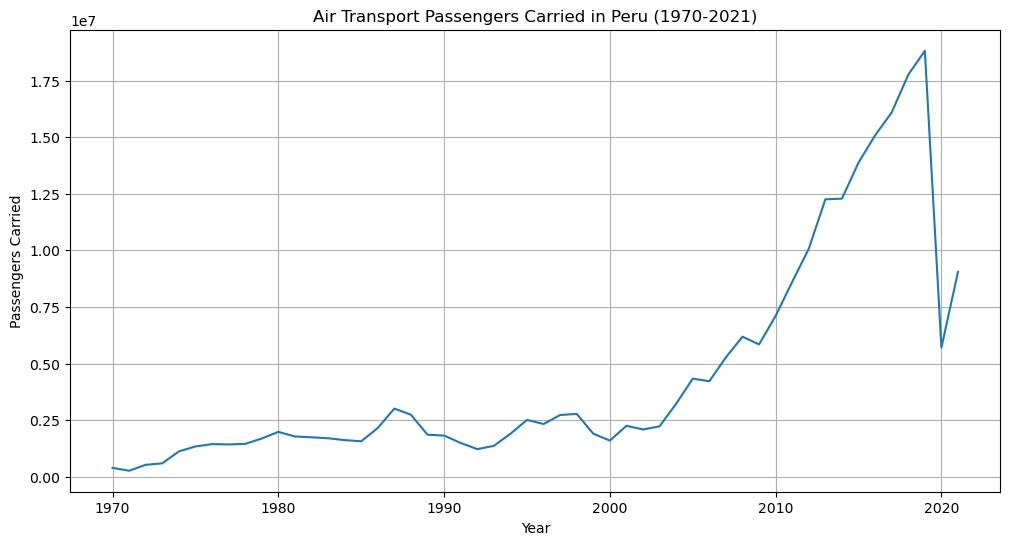

In [18]:
# Loading and Reading  the data from a CSV file 
df = pd.read_csv("API_IS.AIR.PSGR_DS2_en_csv_v2_5871627.csv", skiprows=3)

# air_transport_data = df_air.loc[df_air['Country Name'] == 'Peru']
df=df.loc[df["Country Name"]=="Peru"]
df=df.dropna(axis=1)
df = df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Air transport, passengers carried')

# Convert the 'Year' column to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Create and plotting the a line plot
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Air transport, passengers carried'], linestyle='-')

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Passengers Carried')
plt.title('Air Transport Passengers Carried in Peru (1970-2021)')

# Show the plot
plt.grid(True)
plt.show()
# df 

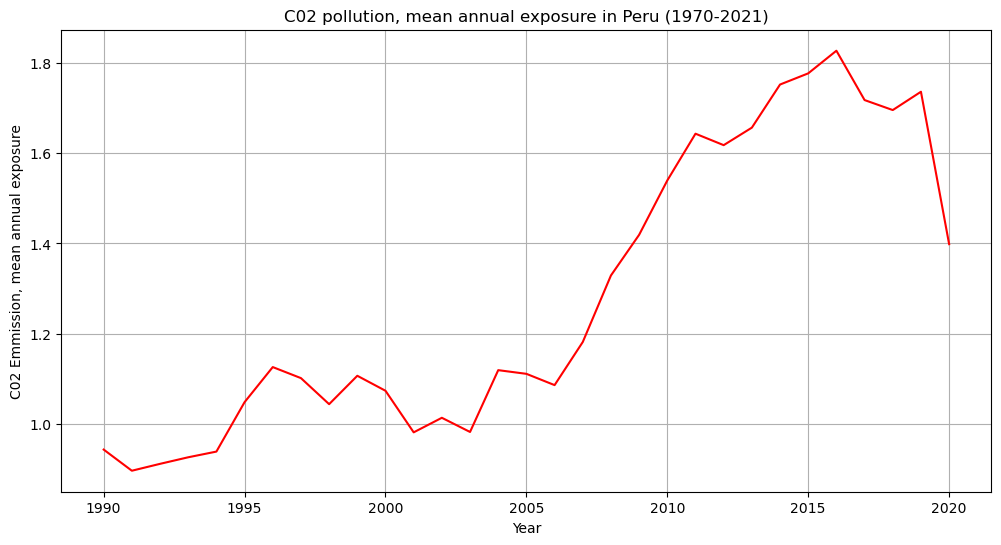

In [19]:
#Loading the data set needed to use
df2 = pd.read_csv("API_EN.ATM.CO2E.PC_DS2_en_csv_v2_5871592.csv",skiprows=3)
# df=df.dropna(axis=1)
# Reshape the data into a long format
# air_transport_data = df_air.loc[df_air['Country Name'] == 'Peru']
df2=df2.loc[df2["Country Name"]=="Peru"]
# df2=df2.dropna(axis=1)
# df2['Year'] = pd.to_numeric(df2['Year'], errors='coerce')
df2 = df2.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)')

# # Converting the 'Year' column to numeric
df2['Year'] = pd.to_numeric(df2['Year'], errors='coerce')

# # making a plot
plt.figure(figsize=(12, 6))
plt.plot(df2['Year'], df2['PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'], color ='r',linestyle='-')

# # labeling and tittling my graph
plt.xlabel('Year')
plt.ylabel('C02 Emmission, mean annual exposure')
plt.title('C02 pollution, mean annual exposure in Peru (1970-2021)')

# # Show the plot
plt.grid(True)
# plt.show()
# df

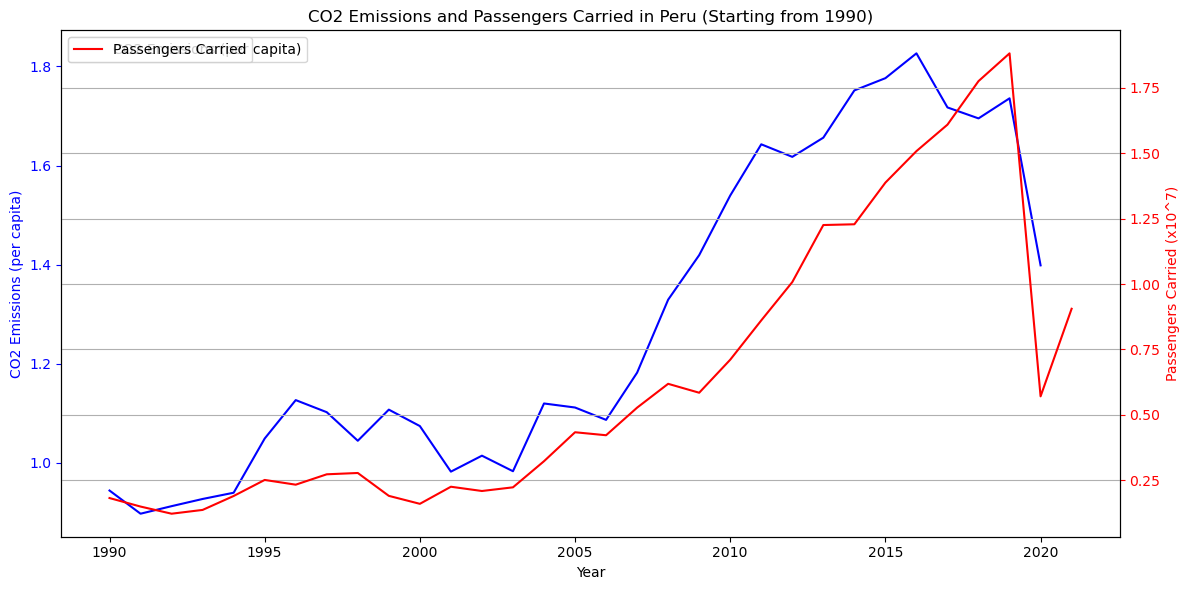

Correlation between CO2 Emissions and Passengers Carried: 0.52


In [20]:

# Load the CO2 emission data
df_co2 = pd.read_csv("API_EN.ATM.CO2E.PC_DS2_en_csv_v2_5871592.csv", skiprows=3)
df_co2 = df_co2.loc[df_co2["Country Name"] == "Peru"]
df_co2 = df_co2.dropna(axis=1)
df_co2 = df_co2.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='CO2 Emissions (per capita)')

# Convert the 'Year' column to numeric
df_co2['Year'] = pd.to_numeric(df_co2['Year'], errors='coerce')

# Load the air transport passengers carried data
df_air_transport = pd.read_csv("API_IS.AIR.PSGR_DS2_en_csv_v2_5871627.csv", skiprows=3)
df_air_transport = df_air_transport.loc[df_air_transport["Country Name"] == "Peru"]
df_air_transport = df_air_transport.dropna(axis=1)
df_air_transport = df_air_transport.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Air transport, passengers carried')

# Convert the 'Year' column to numeric
df_air_transport['Year'] = pd.to_numeric(df_air_transport['Year'], errors='coerce')

# Set a common starting year (e.g., 1990)
common_start_year = 1990

# Filter data to start at the common year
df_co2 = df_co2[df_co2['Year'] >= common_start_year]
df_air_transport = df_air_transport[df_air_transport['Year'] >= common_start_year]

# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the air transport passengers carried on the first y-axis
ax1.plot(df_co2['Year'], df_co2['CO2 Emissions (per capita)'], linestyle='-', color='b', label='CO2 Emissions (per capita)')
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 Emissions (per capita)', color='b')
plt.legend()
ax1.tick_params('y', colors='b')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the air transport passengers carried on the second y-axis
ax2.plot(df_air_transport['Year'], (df_air_transport['Air transport, passengers carried'])/10**7, linestyle='-', color='r', label='Passengers Carried')
ax2.set_ylabel('Passengers Carried (x10^7)', color='r')
ax2.tick_params('y', colors='r')

# Set plot title and legend
plt.title('CO2 Emissions and Passengers Carried in Peru (Starting from ' + str(common_start_year) + ')')
plt.grid(True)
fig.tight_layout()
plt.legend(loc="upper left")
plt.show()

# Calculate correlation
correlation = df_co2['CO2 Emissions (per capita)'].corr(df_air_transport['Air transport, passengers carried'])

print(f"Correlation between CO2 Emissions and Passengers Carried: {correlation:.2f}")


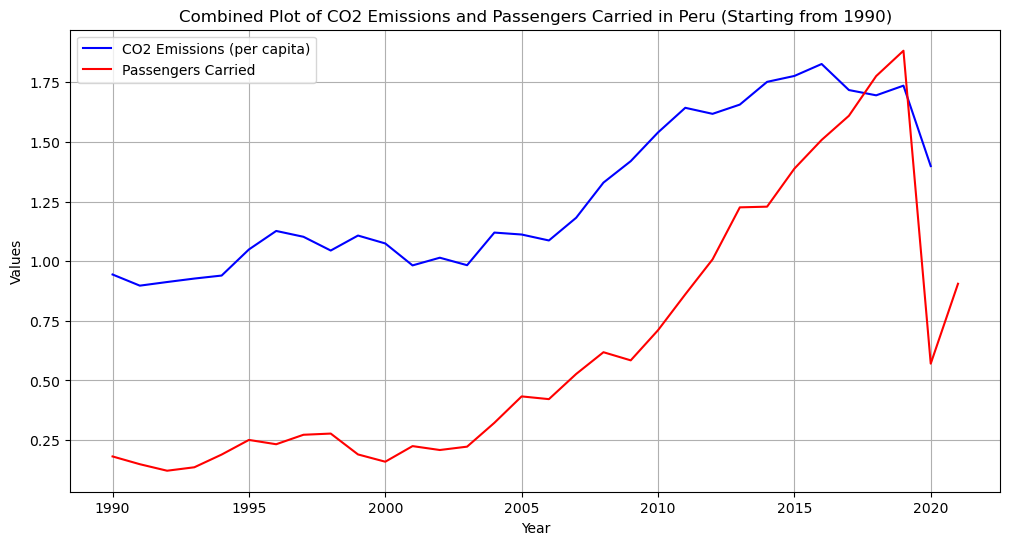

Correlation between CO2 Emissions and Air Transport: 0.52


In [21]:
# Load the CO2 emission data
df_co2 = pd.read_csv("API_EN.ATM.CO2E.PC_DS2_en_csv_v2_5871592.csv", skiprows=3)
df_co2 = df_co2.loc[df_co2["Country Name"] == "Peru"]
df_co2 = df_co2.dropna(axis=1)
df_co2 = df_co2.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='CO2 Emissions (per capita)')

# Convert the 'Year' column to numeric
df_co2['Year'] = pd.to_numeric(df_co2['Year'], errors='coerce')

# Load the air transport passengers carried data
df_air_transport = pd.read_csv("API_IS.AIR.PSGR_DS2_en_csv_v2_5871627.csv", skiprows=3)
df_air_transport = df_air_transport.loc[df_air_transport["Country Name"] == "Peru"]
df_air_transport = df_air_transport.dropna(axis=1)
df_air_transport = df_air_transport.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Air transport, passengers carried')

# Convert the 'Year' column to numeric
df_air_transport['Year'] = pd.to_numeric(df_air_transport['Year'], errors='coerce')

# Set a common starting year (e.g., 1970)
common_start_year = 1990

# Filter data to start at the common year
df_co2 = df_co2[df_co2['Year'] >= common_start_year]
df_air_transport = df_air_transport[df_air_transport['Year'] >= common_start_year]

# Create a figure and axes
plt.figure(figsize=(12, 6))

# Plot both datasets on the same y-axis
plt.plot(df_co2['Year'], df_co2['CO2 Emissions (per capita)'], linestyle='-', color='b', label='CO2 Emissions (per capita)')
plt.plot(df_air_transport['Year'], (df_air_transport['Air transport, passengers carried'])/10**7, linestyle='-', color='r', label='Passengers Carried')

# Set labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Combined Plot of CO2 Emissions and Passengers Carried in Peru (Starting from ' + str(common_start_year) + ')')
# plt.scatter(2025, co2_2025_prediction, color='g', marker='x', s=100, label='2025 Prediction')

plt.grid(True)
plt.legend()

# Show the plot
plt.show()
# Calculate correlation
correlation = df_co2['CO2 Emissions (per capita)'].corr(df_air_transport['Air transport, passengers carried'])

print(f"Correlation between CO2 Emissions and Air Transport: {correlation:.2f}")


### Calculating CDF for both data sets

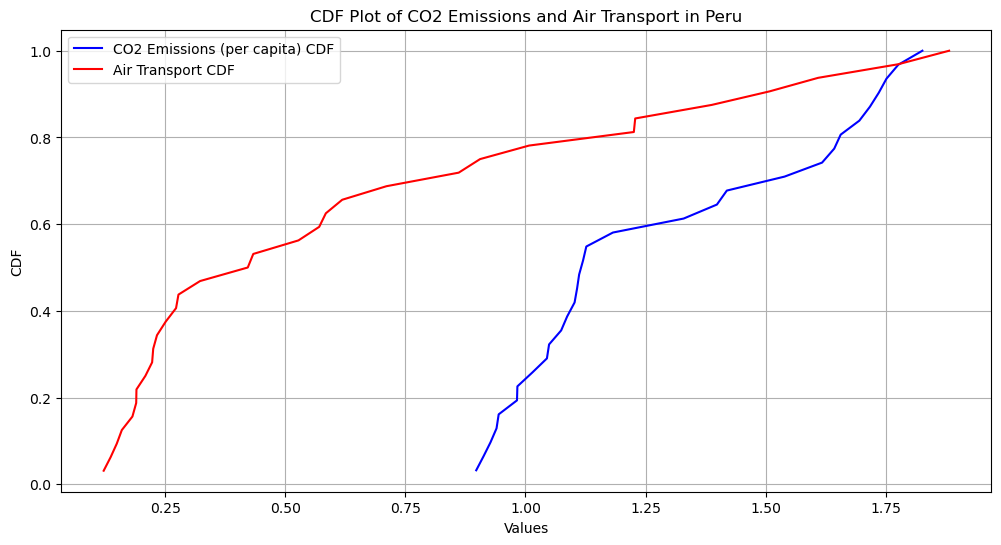

In [22]:
df_co2_sorted = df_co2.sort_values(by='CO2 Emissions (per capita)')
df_air_transport_sorted = df_air_transport.sort_values(by='Air transport, passengers carried')

# Calculate probabilities for CDF
df_co2_sorted['CO2 CDF'] = np.arange(1, len(df_co2_sorted) + 1) / len(df_co2_sorted)
df_air_transport_sorted['Air Transport CDF'] = np.arange(1, len(df_air_transport_sorted) + 1) / len(df_air_transport_sorted)

# Create a figure and axes
plt.figure(figsize=(12, 6))

# Plot CDFs for both datasets
plt.plot(df_co2_sorted['CO2 Emissions (per capita)'], df_co2_sorted['CO2 CDF'], linestyle='-', color='b', label='CO2 Emissions (per capita) CDF')
plt.plot(df_air_transport_sorted['Air transport, passengers carried']/10**7, df_air_transport_sorted['Air Transport CDF'], linestyle='-', color='r', label='Air Transport CDF')

# Set labels, title, and legend
plt.xlabel('Values')
plt.ylabel('CDF')
plt.title('CDF Plot of CO2 Emissions and Air Transport in Peru')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


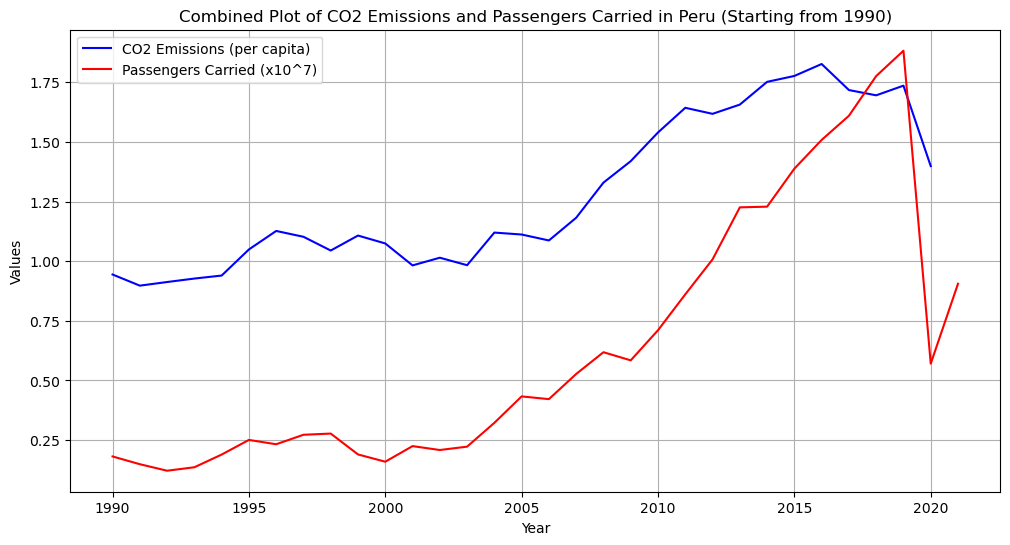

Correlation between CO2 Emissions and Air Transport: 0.52
Predicted Air Transport Passengers Carried for 2021: 13833955.45
Predicted CO2 Emissions in Peru for 2021 (based on passengers carried): 6657045518313.00


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the CO2 emission data
df_co2 = pd.read_csv("API_EN.ATM.CO2E.PC_DS2_en_csv_v2_5871592.csv", skiprows=3)
df_co2 = df_co2.loc[df_co2["Country Name"] == "Peru"]
df_co2 = df_co2.dropna(axis=1)
df_co2 = df_co2.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='CO2 Emissions (per capita)')

# Convert the 'Year' column to numeric
df_co2['Year'] = pd.to_numeric(df_co2['Year'], errors='coerce')

# Load the air transport passengers carried data
df_air_transport = pd.read_csv("API_IS.AIR.PSGR_DS2_en_csv_v2_5871627.csv", skiprows=3)
df_air_transport = df_air_transport.loc[df_air_transport["Country Name"] == "Peru"]
df_air_transport = df_air_transport.dropna(axis=1)
df_air_transport = df_air_transport.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Air transport, passengers carried')

# Convert the 'Year' column to numeric
df_air_transport['Year'] = pd.to_numeric(df_air_transport['Year'], errors='coerce')

# Set a common starting year (e.g., 1990)
common_start_year = 1990

# Filter data to start at the common year
df_co2 = df_co2[df_co2['Year'] >= common_start_year]
df_air_transport = df_air_transport[df_air_transport['Year'] >= common_start_year]

# Create a figure and axes
plt.figure(figsize=(12, 6))

# Plot CO2 emissions and air transport passengers carried on the same y-axis
plt.plot(df_co2['Year'], df_co2['CO2 Emissions (per capita)'], linestyle='-', color='b', label='CO2 Emissions (per capita)')
plt.plot(df_air_transport['Year'], (df_air_transport['Air transport, passengers carried']) / 10**7, linestyle='-', color='r', label='Passengers Carried (x10^7)')

plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Combined Plot of CO2 Emissions and Passengers Carried in Peru (Starting from ' + str(common_start_year) + ')')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

# Calculate correlation
correlation = df_co2['CO2 Emissions (per capita)'].corr(df_air_transport['Air transport, passengers carried'])

print(f"Correlation between CO2 Emissions and Air Transport: {correlation:.2f}")

# Create and fit a linear regression model for air transport passengers carried
X_df_air_transport = df_air_transport[['Year']].values
y_df_air_transport = df_air_transport['Air transport, passengers carried'].values
Model8 = LinearRegression()
Model8.fit(X_df_air_transport, y_df_air_transport)

# Predict Air Transport Passengers Carried for 2021
year_2021 = [[2021]]
air_transport_prediction_2021 = Model8.predict(year_2021)
print(f"Predicted Air Transport Passengers Carried for 2021: {air_transport_prediction_2021[0]:.2f}")

# Use the previously trained Linear Regression model to predict CO2 emissions for 2021
passengers_2021 = air_transport_prediction_2021[0]
co2_2021_prediction = Model8.predict([[passengers_2021]])

# Print the prediction
print(f"Predicted CO2 Emissions in Peru for 2021 (based on passengers carried): {co2_2021_prediction[0]:.2f}")


### Summary Statistics

In [24]:
# df2 = pd.read_csv("API_EN.ATM.CO2E.PC_DS2_en_csv_v2_5871592.csv",skiprows=3)
# df2
# Summary statistics for CO2 emissions
co2_summary = df_co2['CO2 Emissions (per capita)'].describe()

# Summary statistics for air transport data
air_transport_summary = df_air_transport['Air transport, passengers carried'].describe()

print("Summary Statistics for CO2 Emissions:\n", co2_summary)
print("\nSummary Statistics for Air Transport:\n", air_transport_summary)



Summary Statistics for CO2 Emissions:
 count    31.000000
mean      1.281014
std       0.318699
min       0.897427
25%       1.029564
50%       1.119854
75%       1.630184
max       1.826380
Name: CO2 Emissions (per capita), dtype: float64

Summary Statistics for Air Transport:
 count    3.200000e+01
mean     6.374117e+06
std      5.379870e+06
min      1.217600e+06
25%      2.191202e+06
50%      4.275052e+06
75%      9.309188e+06
max      1.882057e+07
Name: Air transport, passengers carried, dtype: float64


In [25]:
# Calculate IQR
co2_iqr = np.percentile(df_co2['CO2 Emissions (per capita)'], 75) - np.percentile(df_co2['CO2 Emissions (per capita)'], 25)
air_transport_iqr = np.percentile(df_air_transport['Air transport, passengers carried'], 75) - np.percentile(df_air_transport['Air transport, passengers carried'], 25)

print(f"IQR for CO2 Emissions: {co2_iqr:.2f}")
print(f"IQR for Air Transport: {air_transport_iqr:.2f}")


IQR for CO2 Emissions: 0.60
IQR for Air Transport: 7117985.15


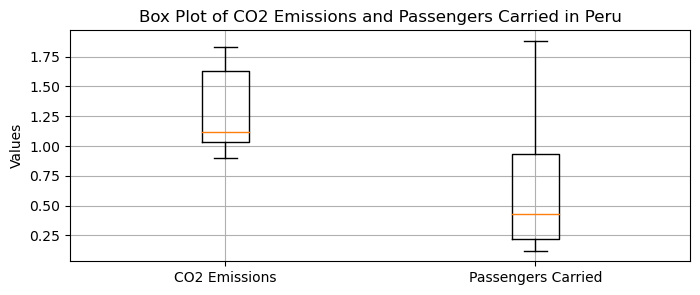

In [26]:
plt.figure(figsize=(8, 3))
plt.boxplot([df_co2['CO2 Emissions (per capita)'], df_air_transport['Air transport, passengers carried'] / 10**7], labels=['CO2 Emissions', 'Passengers Carried'])
plt.ylabel('Values')
plt.title('Box Plot of CO2 Emissions and Passengers Carried in Peru')
plt.grid(True)
plt.show()


### Making  a prediction of Air transport, passengers carried in 2021

In [27]:
#Making a prediction of Air transport, passengers carried of Peru in 2021
X_df_air_transport = df_air_transport[['Year']].values
y_df_air_transport = df_air_transport['Air transport, passengers carried'].values
Model8 = LinearRegression()
Model8.fit(X_df_air_transport, y_df_air_transport)
year_2021 = [[2021]]
air_transport_prediction_2021 = Model8.predict(year_2021)
print(f"Predicted Air Transport Passengers Carried for 2021: {air_transport_prediction_2021[0]:.2f}")


Predicted Air Transport Passengers Carried for 2021: 13833955.45


### Make a prediction for CO2 emissions in 2021 based on air transport passengers carried for 2021

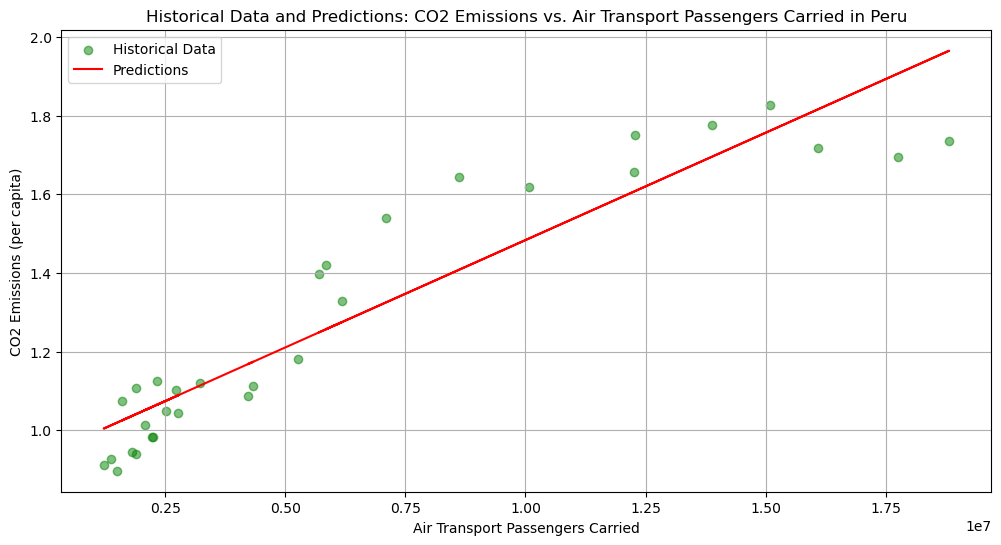

Predicted CO2 Emissions in Peru for 2021 (based on passengers carried): 1.43


/home/geredi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:
# Load the CO2 emission data
df_co2 = pd.read_csv("API_EN.ATM.CO2E.PC_DS2_en_csv_v2_5871592.csv", skiprows=3)
df_co2 = df_co2.loc[df_co2["Country Name"] == "Peru"]
df_co2 = df_co2.dropna(axis=1)
df_co2 = df_co2.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='CO2 Emissions (per capita)')

# Convert the 'Year' column to numeric
df_co2['Year'] = pd.to_numeric(df_co2['Year'], errors='coerce')

# Load the air transport passengers carried data
df_air_transport = pd.read_csv("API_IS.AIR.PSGR_DS2_en_csv_v2_5871627.csv", skiprows=3)
df_air_transport = df_air_transport.loc[df_air_transport["Country Name"] == "Peru"]
df_air_transport = df_air_transport.dropna(axis=1)
df_air_transport = df_air_transport.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Air transport, passengers carried')

# Convert the 'Year' column to numeric
df_air_transport['Year'] = pd.to_numeric(df_air_transport['Year'], errors='coerce')

# Set a common starting year (e.g., 1990)
common_start_year = 1990

# Filter data to start at the common year
df_co2 = df_co2[df_co2['Year'] >= common_start_year]
df_air_transport = df_air_transport[df_air_transport['Year'] >= common_start_year]

# Merge the two datasets on the 'Year' column
merged_data = df_co2.merge(df_air_transport, on='Year', how='inner')

# Create and fit a linear regression model
X_ind = merged_data[['Air transport, passengers carried']]
y_depend = merged_data['CO2 Emissions (per capita)']
model = LinearRegression()
model.fit(X_ind, y_depend)

# Make predictions for each year in the dataset
merged_data['CO2 Emissions Prediction'] = model.predict(X_ind)

# Create a figure and axes
plt.figure(figsize=(12, 6))

# Plot historical data and predictions
plt.scatter(merged_data['Air transport, passengers carried'], merged_data['CO2 Emissions (per capita)'], color ='g',label='Historical Data', alpha=0.5)
plt.plot(merged_data['Air transport, passengers carried'], merged_data['CO2 Emissions Prediction'], color='red', label='Predictions')

# Set labels, title, and legend
plt.xlabel('Air Transport Passengers Carried')
plt.ylabel('CO2 Emissions (per capita)')
plt.title('Historical Data and Predictions: CO2 Emissions vs. Air Transport Passengers Carried in Peru')
plt.grid(True)
plt.legend()

plt.show()
# merged_data['CO2 Emissions Prediction']
X_ind = merged_data[['Air transport, passengers carried']]
y_depend = merged_data['CO2 Emissions (per capita)']

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_ind, y_depend)

# Make a prediction for CO2 emissions in 2021 based on air transport passengers carried for 2021
passengers_2021 = df_air_transport[df_air_transport['Year'] == 2021]['Air transport, passengers carried'].values[0]
co2_2021_prediction = model.predict([[passengers_2021]])

# Print the prediction for 2021
print(f"Predicted CO2 Emissions in Peru for 2021 (based on passengers carried): {co2_2021_prediction[0]:.2f}")




In [29]:
# X = df_co2[['Year']].values
# y = df_co2['CO2 Emissions (per capita)'].values
# regressor = LinearRegression()
# regressor.fit(X, y)
# year_2025 = [[2025]]
# co2_prediction_2025 = regressor.predict(year_2025)
# print(f"Predicted CO2 Emissions for 2025: {co2_prediction_2025[0]:.2f}")


## Q4

In [30]:
# Load the data from the CSV file
df_israel = pd.read_csv("ODA-ISR_LUR.csv")

# Convert the 'Date' column to datetime
df_israel['Date'] = pd.to_datetime(df_israel['Date'])
# df_israel['Date'] = df_israel['Date'].dt.strftime('%Y%m%d').astype(int)
df_israel['Date'] = df_israel['Date'].dt.year
# Filter the data to include only the period from 1980 to 2013
df_israel = df_israel[(df_israel['Date'] >= 1980) & (df_israel['Date'] <= 2012)]

# Prepare data for linear regression
X = df_israel['Date'].values.reshape(-1,1)
y = df_israel['Value']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the unemployment rate for the year 2020
year_2020 = len(df_israel) 
predicted_unemployment_2020 = model.predict([[2020]])
predicted_unemployment_2020[0]
pred=model.predict(X)
# Define the true unemployment rate for 2020
true_unemployment_rate_2020 = 12.0

# Calculate evaluation metrics
# y_pred = model.predict(true_unemployment_rate_2020)
mae = mean_absolute_error(y,pred)
mse = mean_squared_error(y, pred)
r2 = r2_score(y,pred)
mape=mean_absolute_percentage_error(y,pred)
mape_percentage=mape*100
mean_absolute_percentage_error
# Calculate the mean absolute percentage error (MAPE)
# absa = np.abs((true_unemployment_rate_2020 - pred) / true_unemployment_rate_2020)
# mape=np.mean(absa)*100
# # Print the results
Accuracy=100-mape_percentage
print(f"Unemployment Rate prediction for 2020: {predicted_unemployment_2020[0]}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R-squared (R2): {r2*100:.4f}%")
print(f"Mean Absolute Percentage Error (MAPE): {mape_percentage:.4f}%")
print(f"Accuracy: {Accuracy}%")
# type(predicted_unemployment_2020[0])
# mae
# pred


Unemployment Rate prediction for 2020: 12.078546345811048
Mean Absolute Error (MAE): 1.8038
Mean Squared Error (MSE): 4.284
R-squared (R2): 29.2394%
Mean Absolute Percentage Error (MAPE): 21.9926%
Accuracy: 78.007398459728%
